In [24]:
import pymc3 as pm
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
data = pd.read_csv('data/house-prices-advanced-regression-techniques/train.csv')
data = data.dropna(axis=1)

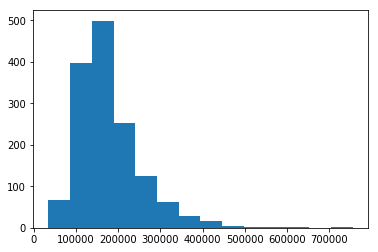

In [27]:
p = plt.hist(data['SalePrice'], bins = 14)

In [38]:
data.corr()['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
BsmtFinSF1       0.386420
Fireplaces       0.466929
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64

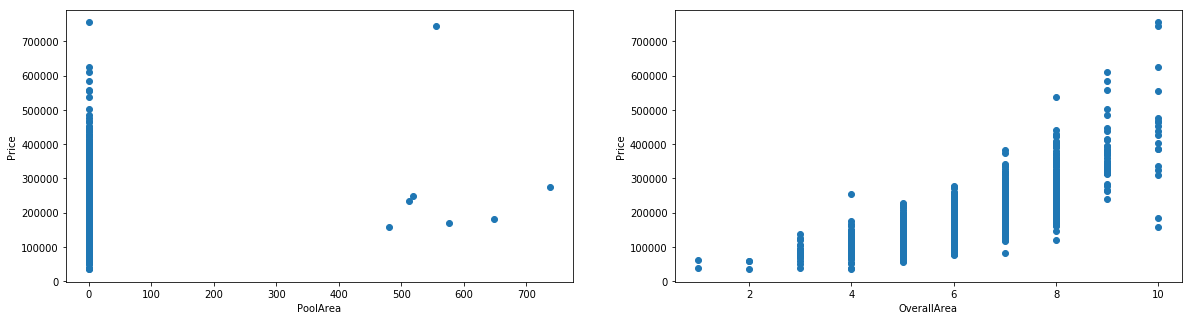

In [56]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(121)
ax.set_xlabel('PoolArea')
ax.set_ylabel('Price')
plt.scatter(x=data.PoolArea, y=data.SalePrice)

ax = fig.add_subplot(122)
ax.set_xlabel('OverallArea')
ax.set_ylabel('Price')
plt.scatter(x=data.OverallQual, y=data.SalePrice)

In [47]:
category_df = data.select_dtypes('object')
dummy_df = pd.get_dummies(category_df)
dummy_df['SalePrice'] = data['SalePrice']
dummy_df.corr()['SalePrice'].sort_values()

ExterQual_TA            -0.589044
KitchenQual_TA          -0.519298
Foundation_CBlock       -0.343263
HeatingQC_TA            -0.312677
MSZoning_RM             -0.288065
LotShape_Reg            -0.267672
CentralAir_N            -0.251328
SaleType_WD             -0.242598
RoofStyle_Gable         -0.224744
PavedDrive_N            -0.212630
Foundation_BrkTil       -0.204117
Neighborhood_OldTown    -0.192189
Neighborhood_NAmes      -0.188513
Neighborhood_Edwards    -0.179949
Exterior1st_MetalSd     -0.167068
Neighborhood_IDOTRR     -0.164056
HouseStyle_1.5Fin       -0.163466
Exterior2nd_MetalSd     -0.162389
Exterior2nd_Wd Sdng     -0.161800
Exterior1st_Wd Sdng     -0.158619
KitchenQual_Fa          -0.157199
SaleCondition_Normal    -0.153990
Neighborhood_BrkSide    -0.143648
ExterCond_Fa            -0.137914
HeatingQC_Gd            -0.134722
HeatingQC_Fa            -0.133758
Neighborhood_Sawyer     -0.128394
Foundation_Slab         -0.119740
SaleCondition_Abnorml   -0.118069
Condition1_Fee

In [76]:
train_dummy_df = pd.get_dummies(category_df[['ExterQual', 'KitchenQual', 'Foundation']])
train_numerical_df = data[['OverallQual', 'GrLivArea', 'GarageArea', 'KitchenAbvGr', 'EnclosedPorch', 'MSSubClass', 'SalePrice']]
train_data = pd.concat([train_numerical_df, train_dummy_df], axis=1)